In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
faskes = gpd.read_file(r'G:/My Drive/Spatial data/Pidie/faskes/faskes_pidie.shp')
tt_all = pd.read_excel(r'G:/My Drive/Spatial data/Zonal Statistics/zonal statistics all facilities pidie.xlsx')
tt_pkm = pd.read_excel(r'G:/My Drive/Spatial data/Zonal Statistics/zonal statistics puskesmas pidie.xlsx')
pop = pd.read_excel(r'G:/My Drive/Spatial data/Populasi/Populasi Pidie BPS 2016.xlsx')

In [3]:
# Count the unique number of health facilities (faskes), which consist of Puskesmas and Pustu
n_all = faskes['faskes_id'].nunique()

# Count the unique number of Puskesmas (community health centers)
n_pkm = faskes[faskes['faskes_typ']=='Puskesmas']['faskes_id'].nunique()

# Sum the total population
pop_total = pop['POPBPS'].sum().astype(int)

In [4]:
# Sort the tt_all DataFrame by 'zone' (travel time to nearest facility) and reset the index
tt_all = tt_all.sort_values('zone').reset_index(drop=True)

# Calculate the percentage of the total population for each zone
tt_all['pct_pop'] = tt_all['sum'] / pop_total * 100

# Calculate the cumulative percentage of the population
tt_all['cum_pct_pop'] = tt_all['pct_pop'].cumsum()

# Filter zones with values up to 60
tt_all_60 = tt_all[tt_all['zone']<=60]

In [5]:
# Sort the tt_pkm DataFrame by 'zone' (travel time to nearest puskesmas) and reset the index
tt_pkm = tt_pkm.sort_values('zone').reset_index(drop=True)

# Calculate the percentage of the total population for each zone
tt_pkm['pct_pop'] = tt_pkm['sum'] / pop_total * 100

# Calculate the cumulative percentage of the population
tt_pkm['cum_pct_pop'] = tt_pkm['pct_pop'].cumsum()

# Filter zones with values up to 60
tt_pkm_60 = tt_pkm[tt_pkm['zone']<=60]

In [6]:
# Merge the filtered DataFrames on 'zone'
tt_merge = tt_all_60.merge(tt_pkm_60, on='zone', suffixes=('_all', '_pkm'))

# Calculate the difference in cumulative population percentage between all facilities and Puskesmas
tt_merge['cum_pct_pop_diff'] = tt_merge['cum_pct_pop_all'] - tt_merge['cum_pct_pop_pkm']

# Find the maximum difference in cumulative population percentage
cum_pct_pop_diff_max = tt_merge['cum_pct_pop_diff'].max()

# Find the zone corresponding to the maximum difference in cumulative population percentage
cum_pct_pop_diff_max_zone = tt_merge[tt_merge['cum_pct_pop_diff']==cum_pct_pop_diff_max]['zone'].values[0]

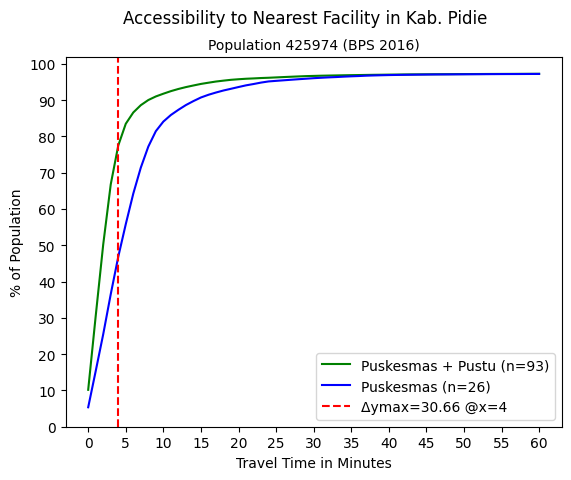

In [7]:
# Plot the cumulative percentage of the population for all facilities up to 60 minutes travel time
plt.plot(tt_all_60['zone'], tt_all_60['cum_pct_pop'], 
         label=f'Puskesmas + Pustu (n={n_all})', color='green')

# Plot the cumulative percentage of the population for Puskesmas up to 60 minutes travel time
plt.plot(tt_pkm_60['zone'], tt_pkm_60['cum_pct_pop'], 
         label=f'Puskesmas (n={n_pkm})', color='blue')

# Add a vertical dashed line at the zone with the maximum difference in cumulative population percentage
plt.axvline(x=cum_pct_pop_diff_max_zone, color='r', linestyle='--', 
            label=f'Δymax={round(cum_pct_pop_diff_max, 2)} @x={cum_pct_pop_diff_max_zone}')

# Set the x-axis ticks to range from 0 to 60 in increments of 5
plt.xticks(list(range(0, 61, 5)))

# Set the y-axis ticks to range from 0 to 100 in increments of 10
plt.yticks(list(range(0, 101, 10)))

# Label the x-axis as 'Travel Time in Minutes'
plt.xlabel('Travel Time in Minutes')

# Label the y-axis as '% of Population'
plt.ylabel('% of Population')

# Set the main title of the plot
plt.suptitle('Accessibility to Nearest Facility in Kab. Pidie')

# Set the subtitle of the plot with the population information
plt.title(f'Population {pop_total} (BPS 2016)', fontsize=10)

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()